<a href="https://colab.research.google.com/github/harshavardhangadila/Sample1/blob/main/HW_5_Data_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gdown
import gdown

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/Prepared_Bank_Dataset.csv"
df = pd.read_csv(file_path)

# Read the dataset
data = pd.read_csv(file_path)
print("✅ Dataset loaded successfully! Shape:", data.shape)

✅ Dataset loaded successfully! Shape: (36424, 17)


In [ ]:
# Display the first few rows of the dataset
print(data.head())

   Loan Status  Current Loan Amount      Term  Credit Score  Annual Income  \
0     0.507163            -0.228872  0.639316     -0.218868       0.820012   
1     0.507163            -0.529486  0.639316     -0.226514      -0.299629   
2     0.507163             1.373056  0.639316     -0.262662       1.169700   
3     0.507163            -0.228872  0.639316     -0.227905      -0.801439   
4     0.507163            -0.228872  0.639316     -0.219563      -0.735652   

   Years in current job  Home Ownership   Purpose  Monthly Debt  \
0              1.411455        0.135943 -0.365044      0.820666   
1              2.052483       -0.916691 -0.365044     -0.695372   
2             -0.511632        1.188577 -0.365044     -0.050363   
3             -0.191117        1.188577 -0.365044     -0.613066   
4              2.052483        0.135943 -0.365044     -0.635613   

   Years of Credit History  Months since last delinquent  \
0                -0.625882                     -0.266993   
1       

In [ ]:
# Display summary statistics
print(data.describe())

        Loan Status  Current Loan Amount          Term  Credit Score  \
count  3.642400e+04         3.642400e+04  3.642400e+04  3.642400e+04   
mean  -2.945639e-17        -3.628403e-17 -3.964908e-17  5.754725e-18   
std    1.000014e+00         1.000014e+00  1.000014e+00  1.000014e+00   
min   -1.971754e+00        -1.656853e+00 -1.564171e+00 -3.273099e-01   
25%    5.071626e-01        -6.838387e-01 -1.564171e+00 -2.459783e-01   
50%    5.071626e-01        -2.288719e-01  6.393162e-01 -2.327705e-01   
75%    5.071626e-01         5.250026e-01  6.393162e-01 -2.209531e-01   
max    5.071626e-01         2.755022e+00  6.393162e-01  4.486553e+00   

       Annual Income  Years in current job  Home Ownership       Purpose  \
count   3.642400e+04          36424.000000    3.642400e+04  3.642400e+04   
mean    4.057569e-17              0.000000   -1.488426e-16  3.579634e-17   
std     1.000014e+00              1.000014    1.000014e+00  1.000014e+00   
min    -1.446256e+00             -1.152660   -1

In [ ]:
# Check for any missing values
print(data.isnull().sum())

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64


In [ ]:
# Show data types
print(data.dtypes)

Loan Status                     float64
Current Loan Amount             float64
Term                            float64
Credit Score                    float64
Annual Income                   float64
Years in current job            float64
Home Ownership                  float64
Purpose                         float64
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


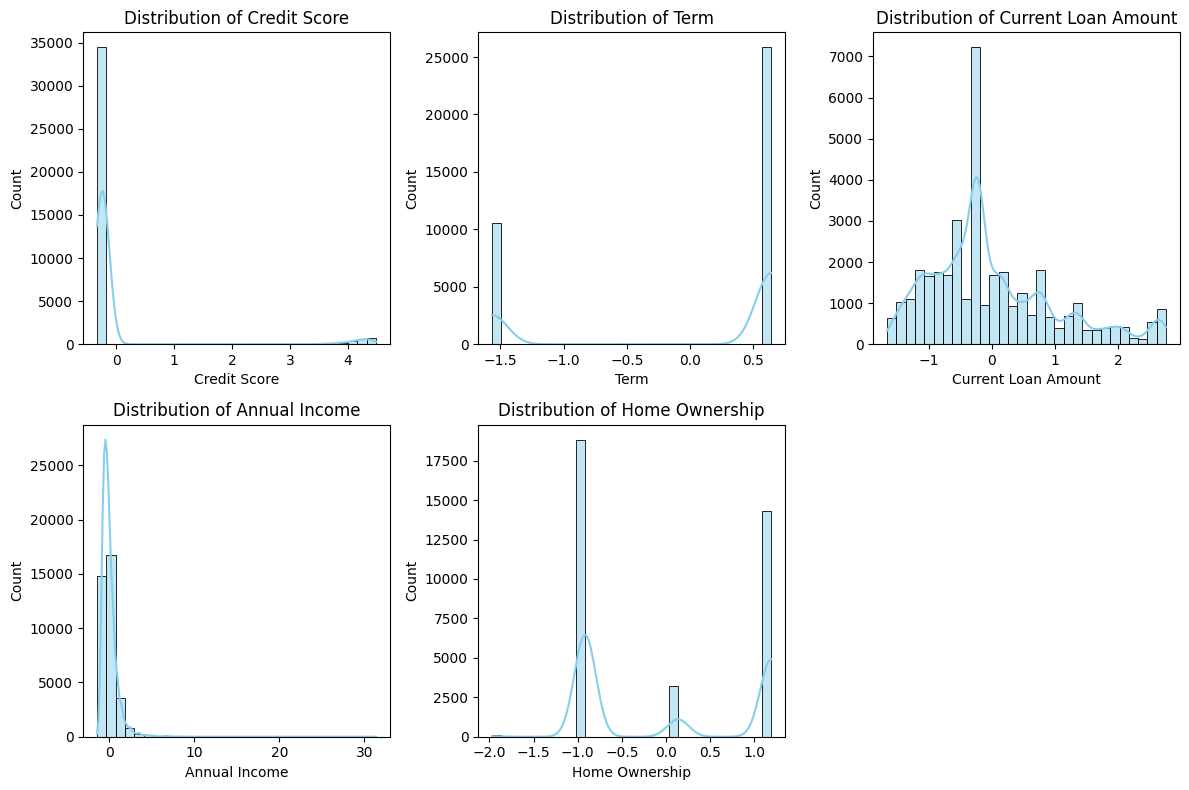

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top features based on correlation (absolute values > 0.05 for meaningful impact)
top_features = ["Credit Score", "Term", "Current Loan Amount", "Annual Income", "Home Ownership"]

# Plot histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], bins=30, kde=True, color="skyblue") # sns is now defined and can be used
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

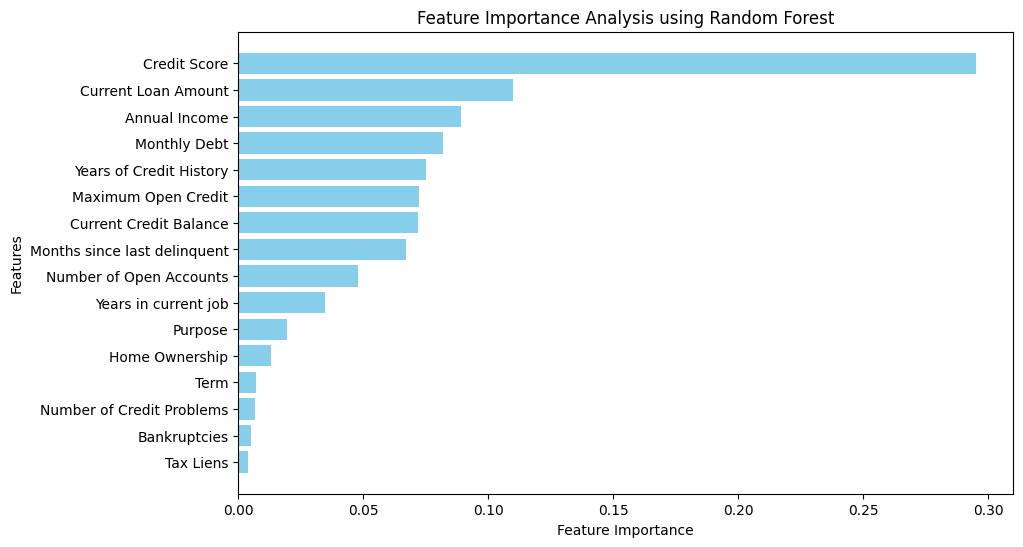

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define features and target
X = data.drop(columns=["Loan Status"])  # Features
y = data["Loan Status"]  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Analysis using Random Forest")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


In [ ]:
# Convert Loan Status into a binary classification target
data["Loan_Status_Binary"] = (data["Loan Status"] > 0).astype(int)

# Check class distribution for the binary classification approach
binary_class_distribution = data["Loan_Status_Binary"].value_counts()

# Display class distribution
binary_class_distribution_df = pd.DataFrame({
    "Binary Classification (Loan Approved = 1, Rejected = 0)": binary_class_distribution
})

# Or for a more formatted display:
display(binary_class_distribution_df)

,"Binary Classification (Loan Approved = 1, Rejected = 0)"
Loan_Status_Binary,
1,28972
0,7452


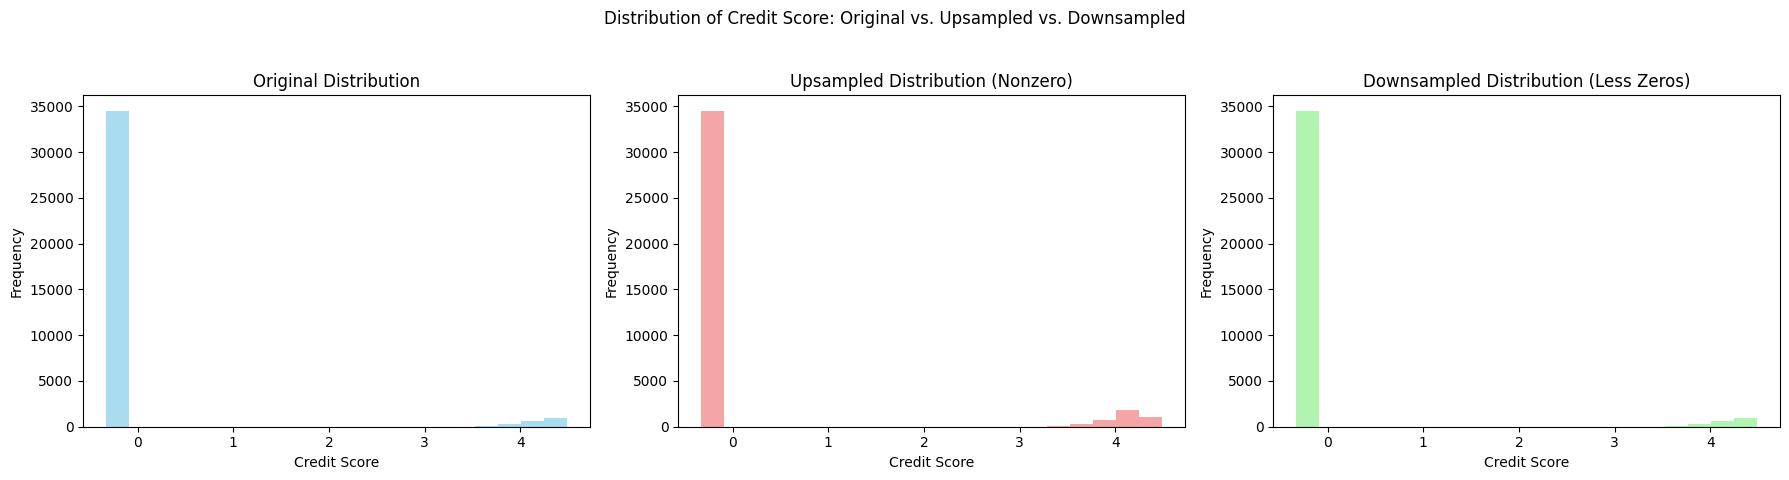

In [ ]:
from sklearn.utils import resample

# Select the feature for modification
feature = "Credit Score"  # Using Credit Score as an example key feature

# ---------------- UPSAMPLING NONZERO LOW VALUES ----------------
# Select only nonzero values
nonzero_values = data[data[feature] > 0]

# Select lower 50% of nonzero values for upsampling
lower_half_nonzero = nonzero_values[nonzero_values[feature] <= nonzero_values[feature].median()]

# Ensure we have enough samples for upsampling
if len(lower_half_nonzero) > 0:
    upsampled_nonzero = resample(
        lower_half_nonzero, replace=True, n_samples=min(len(data) // 3, len(lower_half_nonzero) * 2), random_state=42
    )
    upsampled_data = pd.concat([data, upsampled_nonzero])
else:
    upsampled_data = data.copy()  # No upsampling possible

# ---------------- DOWNSAMPLING EXCESSIVE ZEROS ----------------
# Identify excessive zero values
zero_activity = data[data[feature] == 0]

# Downsample the zero values
if len(zero_activity) > 0:
    downsampled_zero = resample(
        zero_activity, replace=False, n_samples=min(len(data) // 3, len(zero_activity)), random_state=42
    )
    downsampled_data = pd.concat([data[data[feature] > 0], downsampled_zero])
else:
    downsampled_data = data.copy()  # No downsampling possible

# ---------------- PLOTTING THE DISTRIBUTIONS ----------------
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.suptitle(f"Distribution of {feature}: Original vs. Upsampled vs. Downsampled")

# Original Distribution
axes[0].hist(data[feature], bins=20, color="skyblue", alpha=0.7)
axes[0].set_title("Original Distribution")
axes[0].set_xlabel(feature)
axes[0].set_ylabel("Frequency")

# Upsampled Distribution
axes[1].hist(upsampled_data[feature], bins=20, color="lightcoral", alpha=0.7)
axes[1].set_title("Upsampled Distribution (Nonzero)")
axes[1].set_xlabel(feature)
axes[1].set_ylabel("Frequency")

# Downsampled Distribution
axes[2].hist(downsampled_data[feature], bins=20, color="lightgreen", alpha=0.7)
axes[2].set_title("Downsampled Distribution (Less Zeros)")
axes[2].set_xlabel(feature)
axes[2].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Import necessary libraries for the Muller Loop
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Prepare data (features and target)
X = data.drop(columns=["Loan Status", "Loan_Status_Binary"])  # Features
y = data["Loan_Status_Binary"]  # Binary target (Loan Approved = 1, Rejected = 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models for the Muller Loop
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Store detailed results
model_results = {}

# Train models in the Muller Loop
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Store results
    model_results[name] = {
        "F1-score": f1,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} - F1 Score: {f1:.4f}")

# Display model performance results in a DataFrame
import pandas as pd
import ace_tools as tools

results_df = pd.DataFrame(
    {"Model": model_results.keys(), "F1 Score": [res["F1-score"] for res in model_results.values()]}
).sort_values(by="F1 Score", ascending=False)

tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=results_df)

# Plot confusion matrices for all models
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(20, 5))
fig.suptitle("Confusion Matrices for Different Models")

for i, (name, result) in enumerate(model_results.items()):
    ax = axes[i]
    cm = result["Confusion Matrix"]
    ax.imshow(cm, cmap="Blues", alpha=0.7)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Training Random Forest...
Random Forest - F1 Score: 0.8128
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:52:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - F1 Score: 0.8112
Training SVM...
SVM - F1 Score: 0.8086
Training MLP...
MLP - F1 Score: 0.8023


ModuleNotFoundError: No module named 'ace_tools'

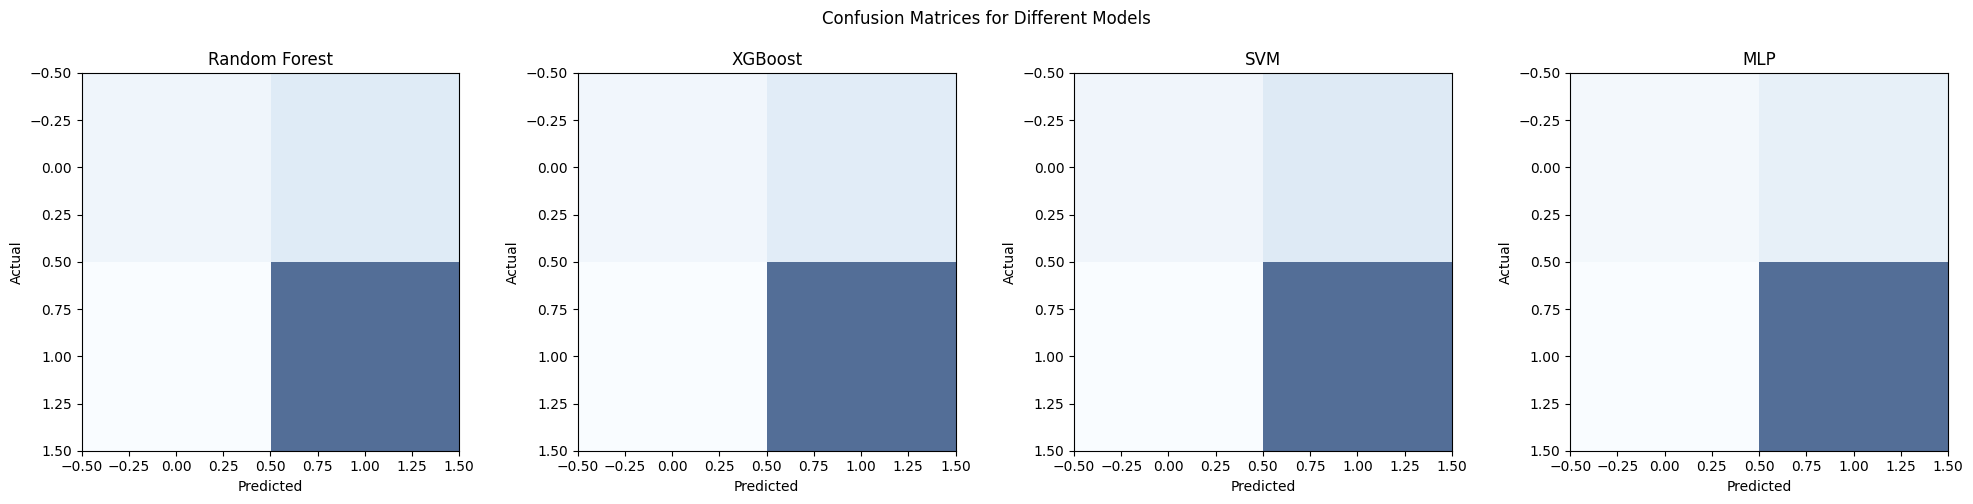

In [ ]:

# Plot confusion matrices for all models
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(20, 5))
fig.suptitle("Confusion Matrices for Different Models")

for i, (name, result) in enumerate(model_results.items()):
    ax = axes[i]
    cm = result["Confusion Matrix"]
    ax.imshow(cm, cmap="Blues", alpha=0.7)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
!pip install holoviews hvplot panel --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install jupyter_bokeh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import holoviews as hv
import hvplot.pandas
import panel as pn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from io import BytesIO
from PIL import Image

hv.extension("bokeh")
pn.extension()

Training Random Forest...
Random Forest - F1 Score: 0.8154
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:12:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - F1 Score: 0.7848
Training SVM...
SVM - F1 Score: 0.7784
Training MLP...
MLP - F1 Score: 0.7126

Model Performance Summary:
           Model  F1 Score
0  Random Forest  0.815435
1        XGBoost  0.784781
2            SVM  0.778391
3            MLP  0.712628


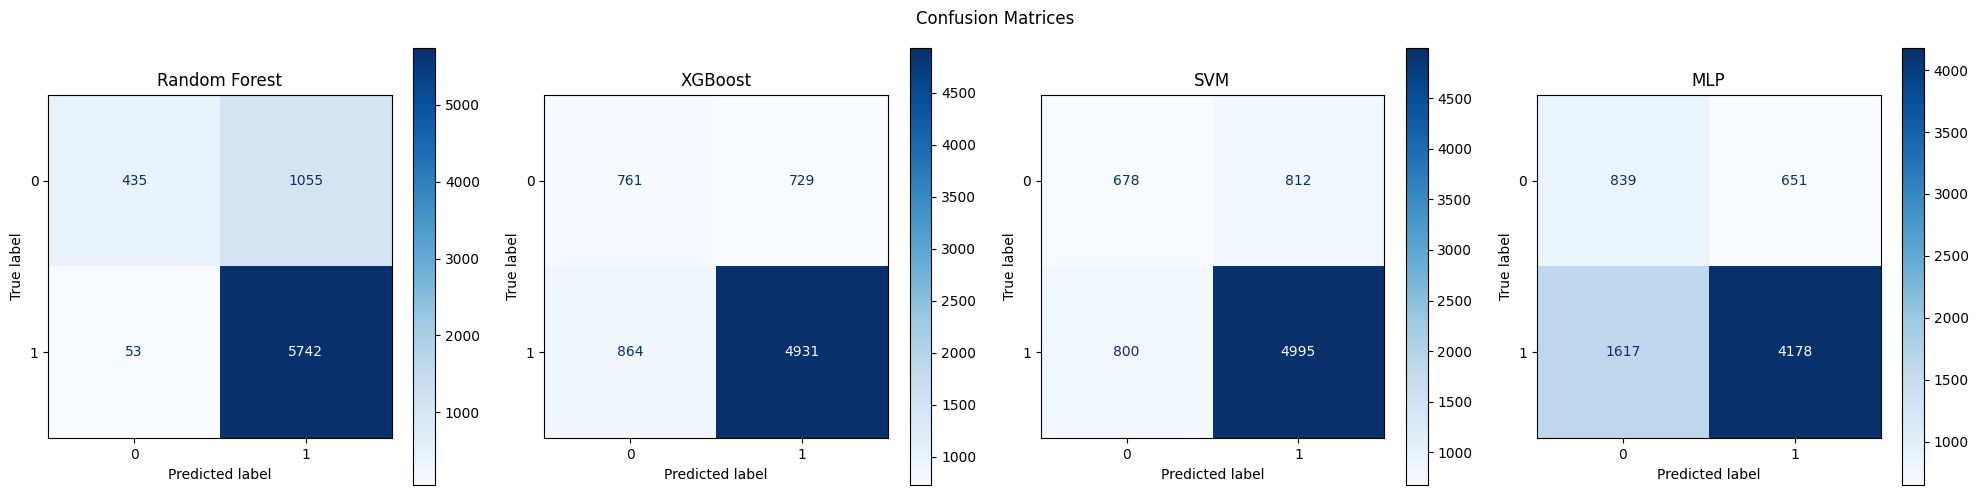

In [ ]:
# ------------------ LOAD & PREPARE DATA ------------------

# Load dataset
file_path = "/content/Prepared_Bank_Dataset.csv"  # Update path if needed
data = pd.read_csv(file_path)

# Convert Loan Status into a binary classification target
data["Loan_Status_Binary"] = (data["Loan Status"] > 0).astype(int)

# Drop the original Loan Status column
X = data.drop(columns=["Loan Status", "Loan_Status_Binary"])
y = data["Loan_Status_Binary"]

# Convert categorical features to numeric
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in X.select_dtypes(exclude=["number"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Split dataset into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ------------------ HANDLE CLASS IMBALANCE (OPTIONAL) ------------------

# Upsample the minority class if needed
if y_train.value_counts().min() < 0.3 * len(y_train):
    df_train = pd.concat([X_train, y_train], axis=1)
    majority_class = df_train[df_train["Loan_Status_Binary"] == 1]
    minority_class = df_train[df_train["Loan_Status_Binary"] == 0]

    minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
    df_train_balanced = pd.concat([majority_class, minority_upsampled])

    X_train = df_train_balanced.drop(columns=["Loan_Status_Binary"])
    y_train = df_train_balanced["Loan_Status_Binary"]

# ------------------ DEFINE MODELS & TRAIN (MULLER LOOP) ------------------

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

model_results = {}

# Train models in the Muller Loop
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Store results
    model_results[name] = {
        "F1-score": f1,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
    }

    print(f"{name} - F1 Score: {f1:.4f}")

# ------------------ DISPLAY RESULTS ------------------

# Create results DataFrame
results_df = pd.DataFrame({
    "Model": model_results.keys(),
    "F1 Score": [res["F1-score"] for res in model_results.values()]
}).sort_values(by="F1 Score", ascending=False)

print("\nModel Performance Summary:")
print(results_df)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
fig.suptitle("Confusion Matrices")

for i, (name, result) in enumerate(model_results.items()):
    cm_display = ConfusionMatrixDisplay(result["Confusion Matrix"])
    cm_display.plot(ax=axes[i], cmap="Blues")
    axes[i].set_title(name)

plt.tight_layout()
plt.show()

# ------------------ VISUALIZATION WITH HOLOVIEWS ------------------

# Plot feature importance for the best model
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

if hasattr(best_model, "feature_importances_"):
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances}).sort_values(by="Importance", ascending=False)

    feature_plot = importance_df.hvplot.barh(x="Feature", y="Importance", title="Feature Importance", height=500, width=800)
    pn.panel(feature_plot).servable()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:35:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Column
    [0] Markdown(str)
    [1] FloatSlider(name='Change Data D..., start=-1)
    [2] ParamFunction(function, _pane=Column, defer_load=False)
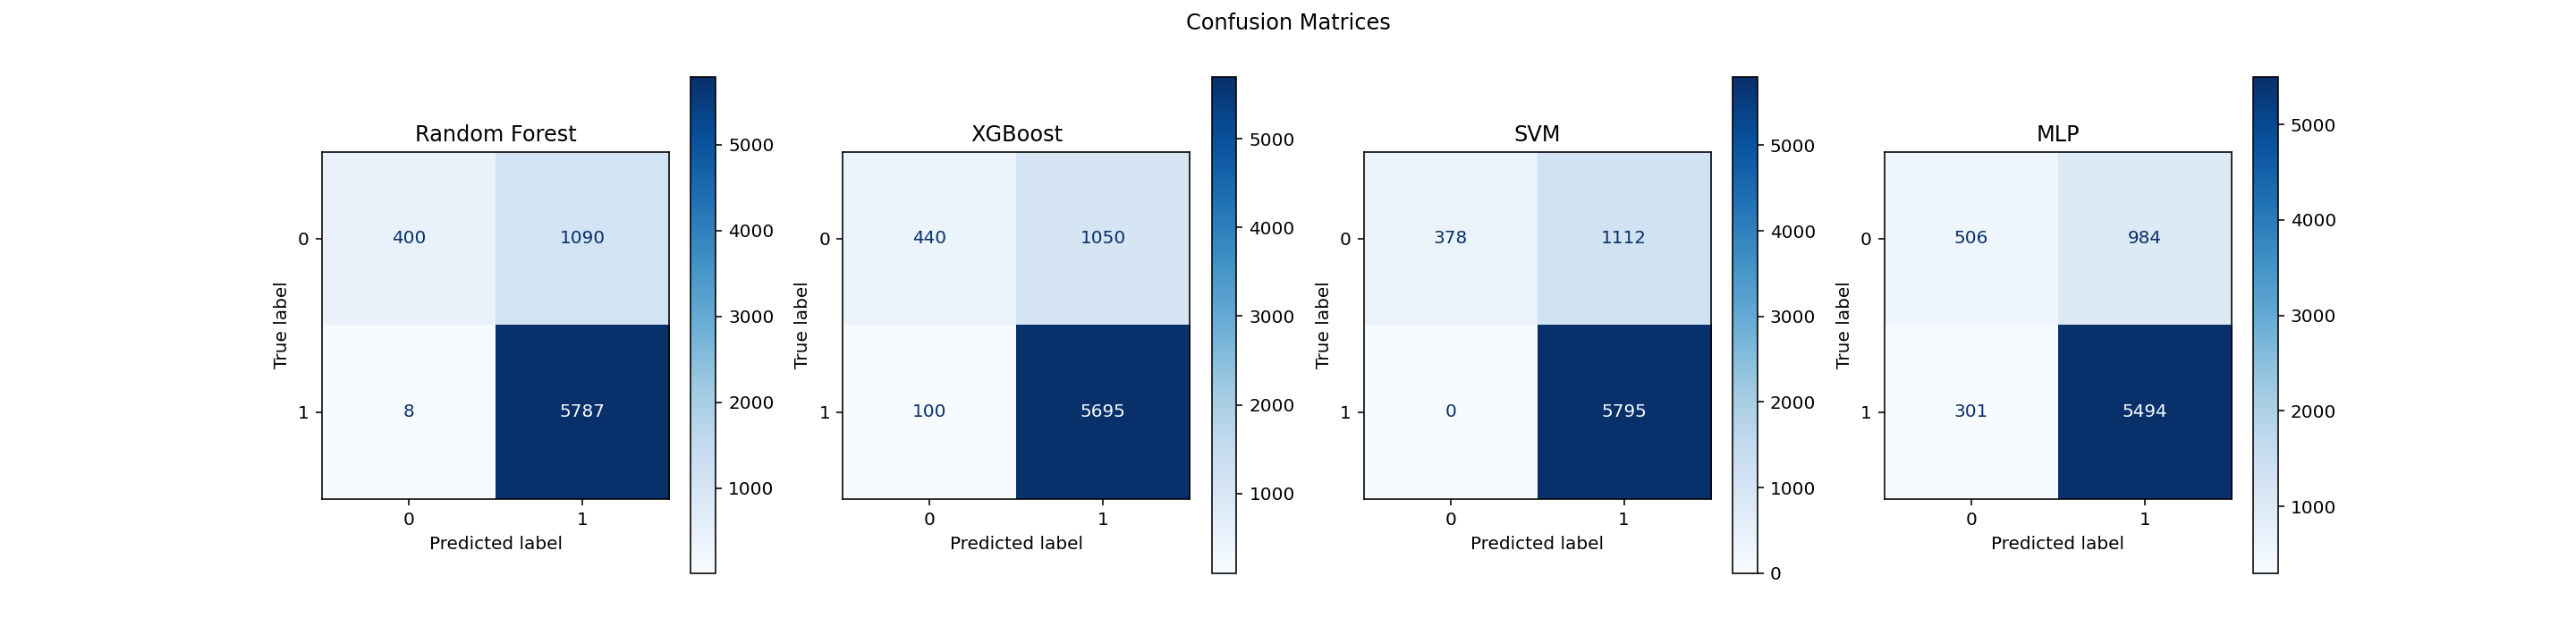

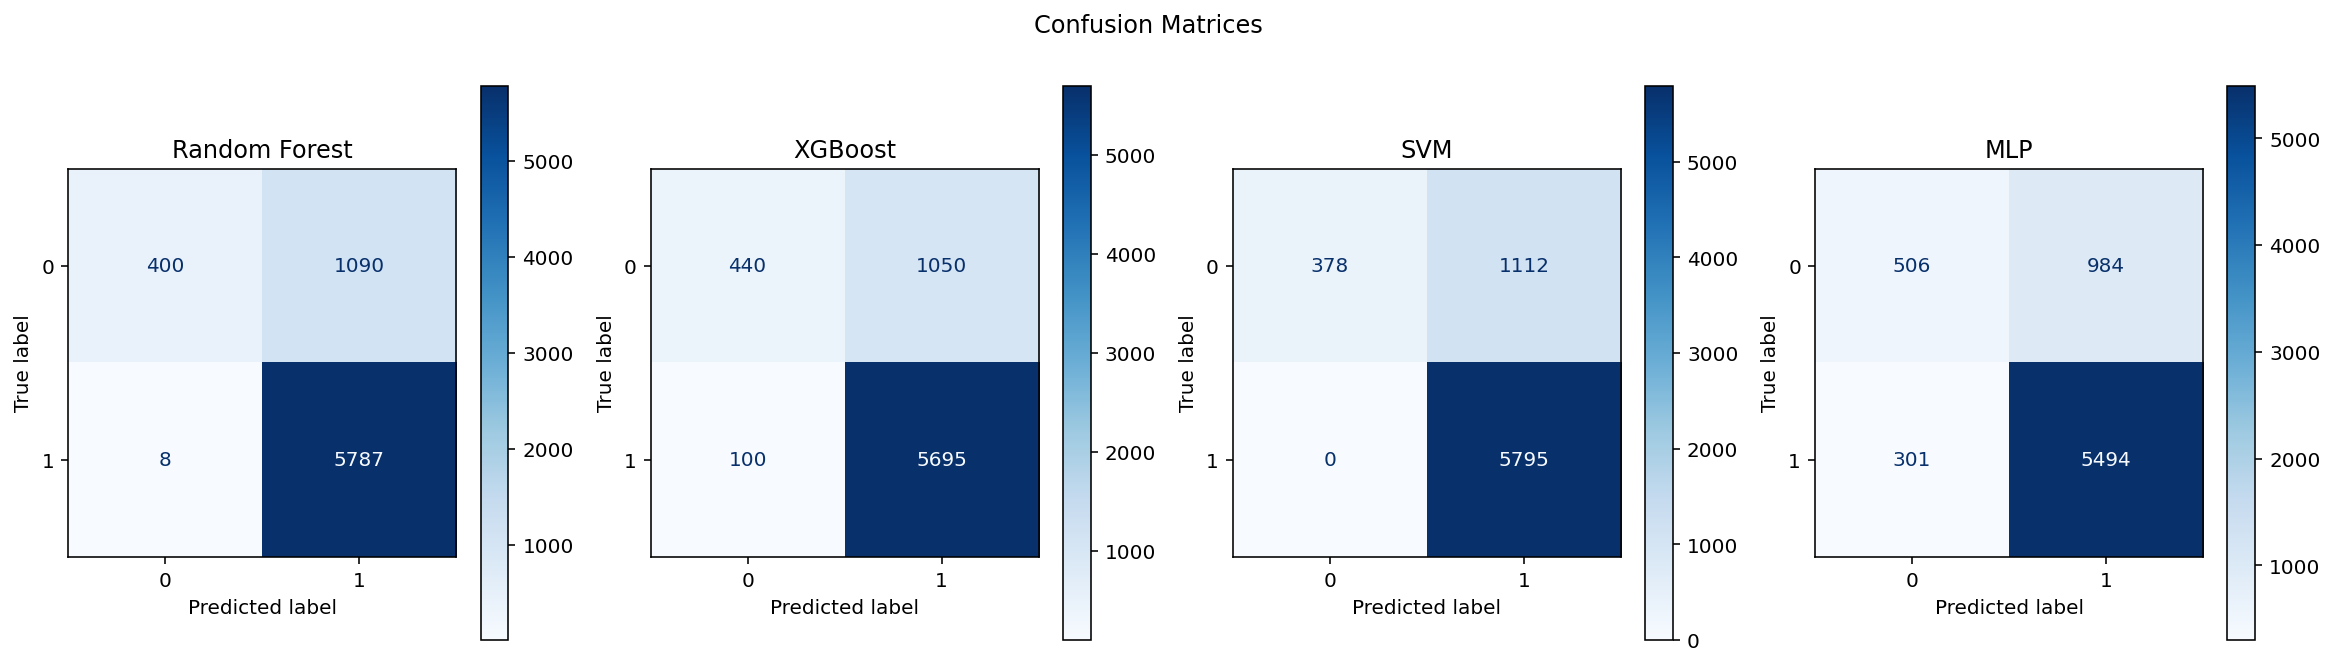

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:42:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


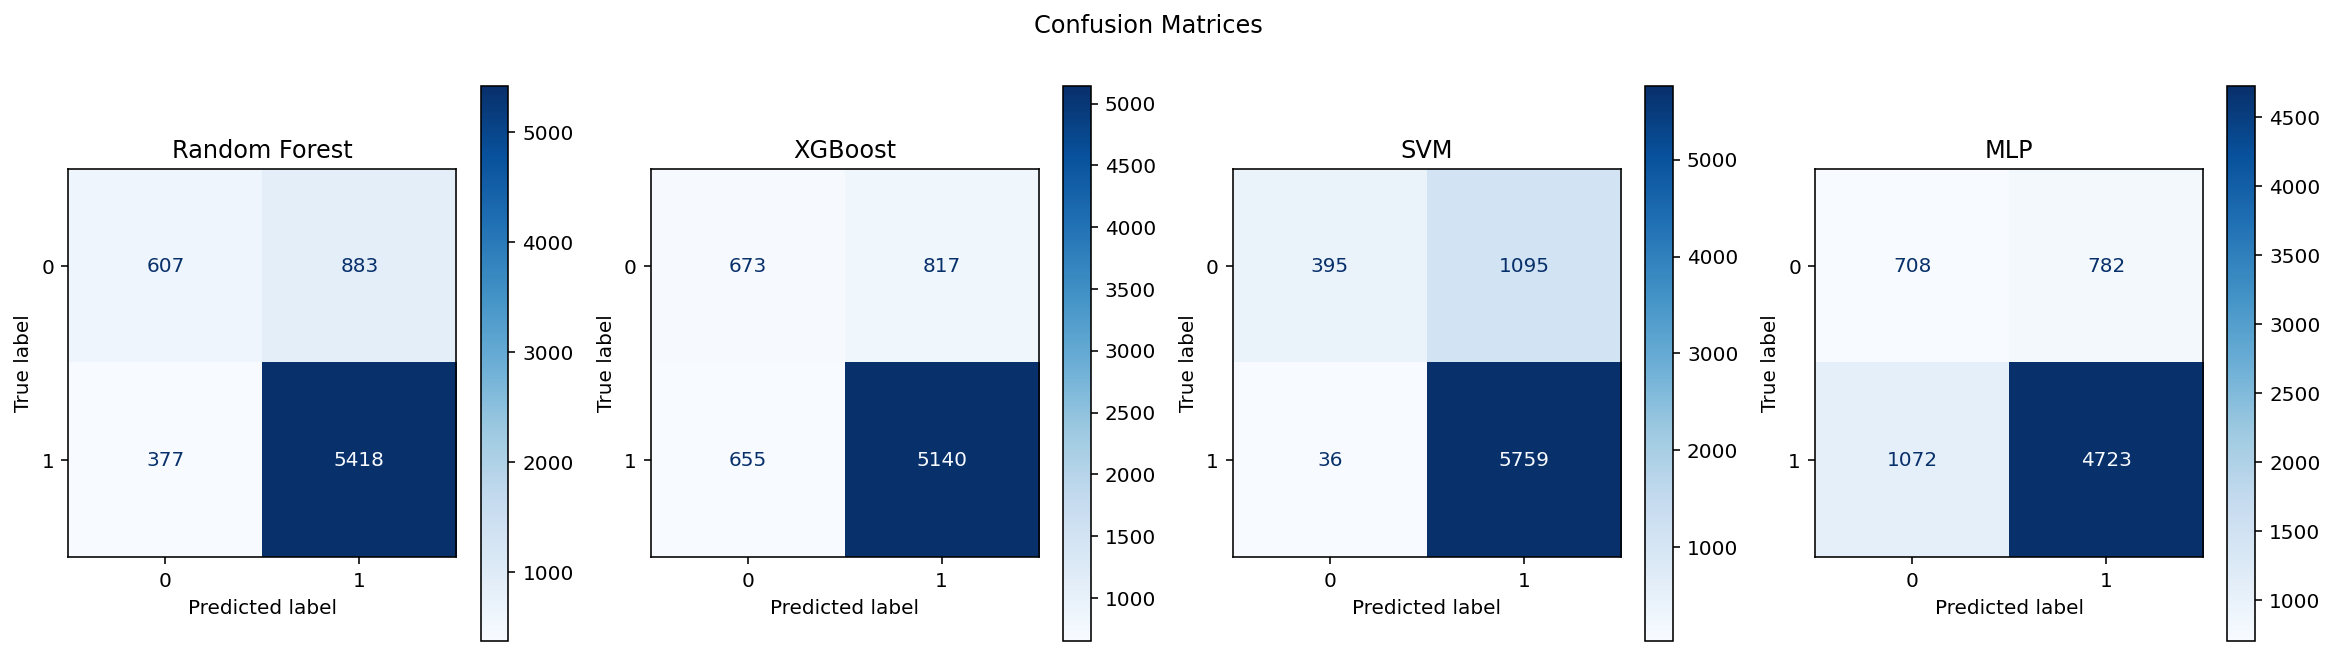

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:44:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


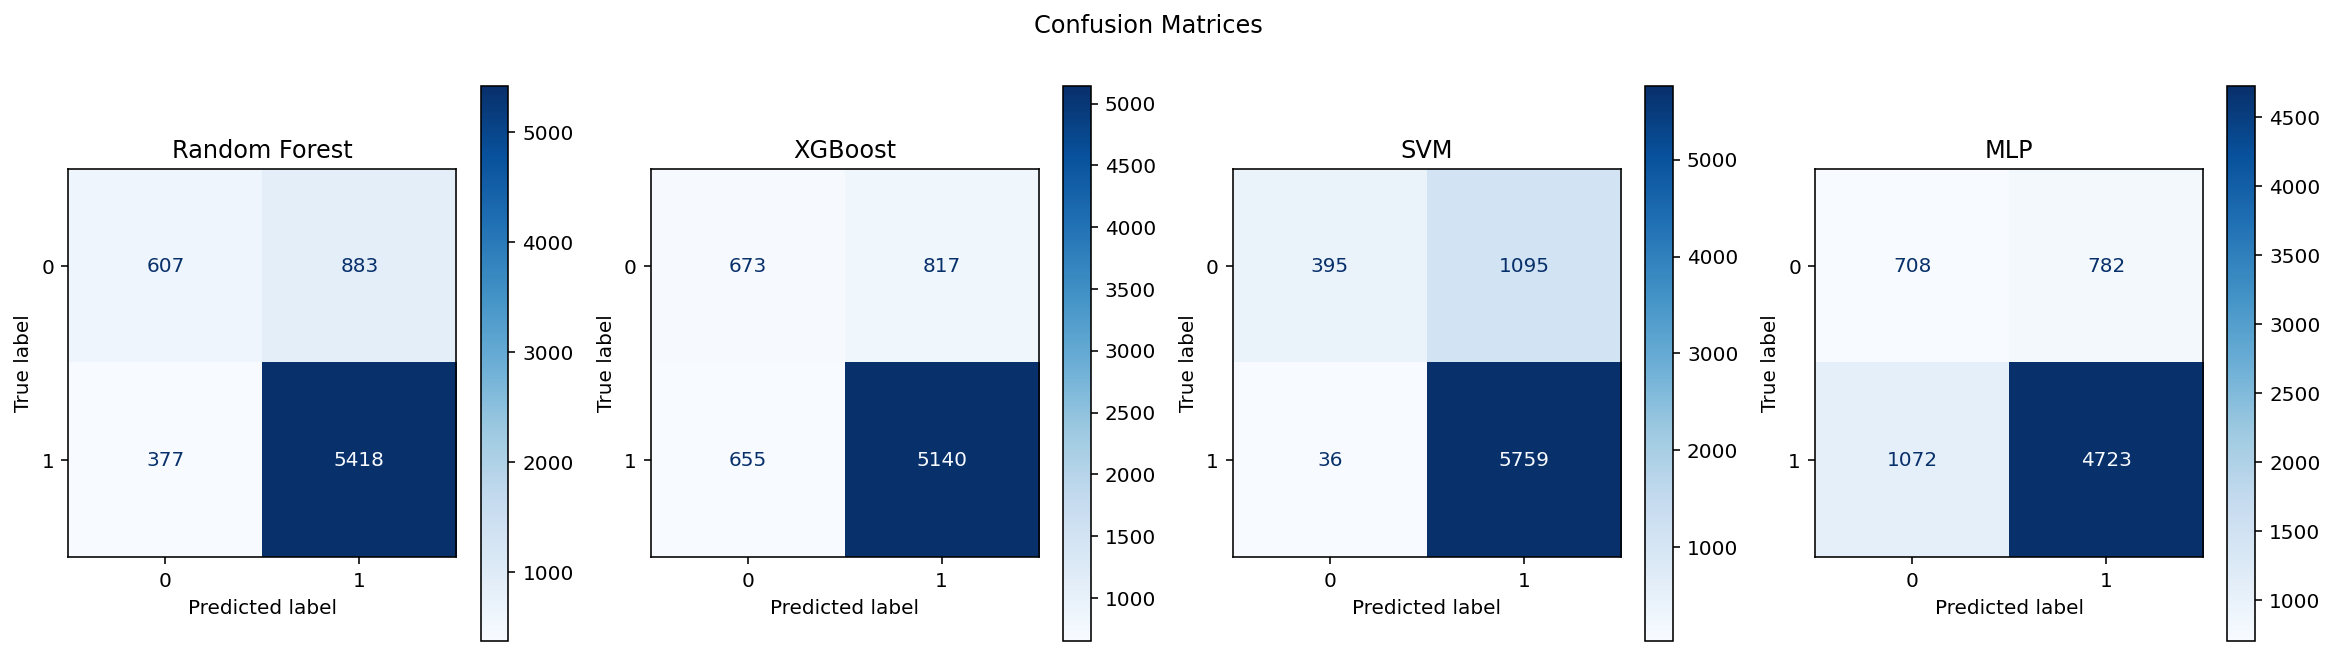

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import holoviews as hv
import hvplot.pandas
import panel as pn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

hv.extension("bokeh")
pn.extension()

# ------------------ LOAD & PREPARE DATA ------------------

# Load dataset
file_path = "Prepared_Bank_Dataset.csv"  # Update path if needed
data = pd.read_csv(file_path)

# Convert Loan Status into a binary classification target
data["Loan_Status_Binary"] = (data["Loan Status"] > 0).astype(int)

# Drop the original Loan Status column
X = data.drop(columns=["Loan Status", "Loan_Status_Binary"])
y = data["Loan_Status_Binary"]

# Convert categorical features to numeric
label_encoders = {}
for col in X.select_dtypes(exclude=["number"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Split dataset into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ------------------ FEATURE IMPORTANCE ANALYSIS ------------------

# Train a baseline model to determine important features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Select the most important feature for upsampling/downsampling
selected_feature = feature_importances.iloc[0]["Feature"]

# ------------------ UPSAMPLING & DOWNSAMPLING FUNCTIONS ------------------

def upsample_data(X_train, y_train):
    smote = SMOTE(sampling_strategy=0.6, random_state=42)  # Balance dataset
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

def downsample_data(X_train, y_train):
    rus = RandomUnderSampler(sampling_strategy=0.6, random_state=42)  # Reduce majority class
    X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

# ------------------ DEFINE MODELS & TRAIN FUNCTION ------------------

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

def train_models(X_train, y_train):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average="weighted")
        results[name] = {
            "Model": model,
            "F1-score": f1,
            "Confusion Matrix": confusion_matrix(y_test, y_pred),
        }
    return results

# ------------------ INTERACTIVE DASHBOARD ------------------

# Create a slider for data distribution control
distribution_slider = pn.widgets.FloatSlider(name="Change Data Distribution", start=-1, end=1, step=0.1, value=0)

# Function to retrain models when slider is moved
def update_dashboard(slider_value):
    global X_train, y_train

    # Modify data distribution based on slider value
    if slider_value < 0:
        X_train_resampled, y_train_resampled = downsample_data(X_train, y_train)
    elif slider_value > 0:
        X_train_resampled, y_train_resampled = upsample_data(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train  # No change

    # Retrain models
    model_results = train_models(X_train_resampled, y_train_resampled)

    # Display model performance
    results_df = pd.DataFrame({
        "Model": model_results.keys(),
        "F1 Score": [res["F1-score"] for res in model_results.values()]
    }).sort_values(by="F1 Score", ascending=False)

    # Confusion matrix plots
    fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
    fig.suptitle("Confusion Matrices")

    for i, (name, result) in enumerate(model_results.items()):
        cm_display = ConfusionMatrixDisplay(result["Confusion Matrix"])
        cm_display.plot(ax=axes[i], cmap="Blues")
        axes[i].set_title(name)

    confusion_matrix_plot = pn.pane.Matplotlib(fig)

    return pn.Column(
        pn.pane.Markdown("### Model Performance"),
        pn.pane.DataFrame(results_df),
        pn.pane.Markdown("### Confusion Matrices"),
        confusion_matrix_plot
    )

# Bind function to the slider
dashboard = pn.bind(update_dashboard, distribution_slider)

# Layout
pn.Column(
    pn.pane.Markdown("# Loan Approval Prediction Dashboard"),
    distribution_slider,
    dashboard
).servable()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:34:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] MultiSelect(name='Select Features f..., options=['Current Loan Amount', ...], value=['Credit Score'])
    [3] FloatSlider(name='Change Data D..., start=-1)
    [4] ParamFunction(function, _pane=Column, defer_load=False)
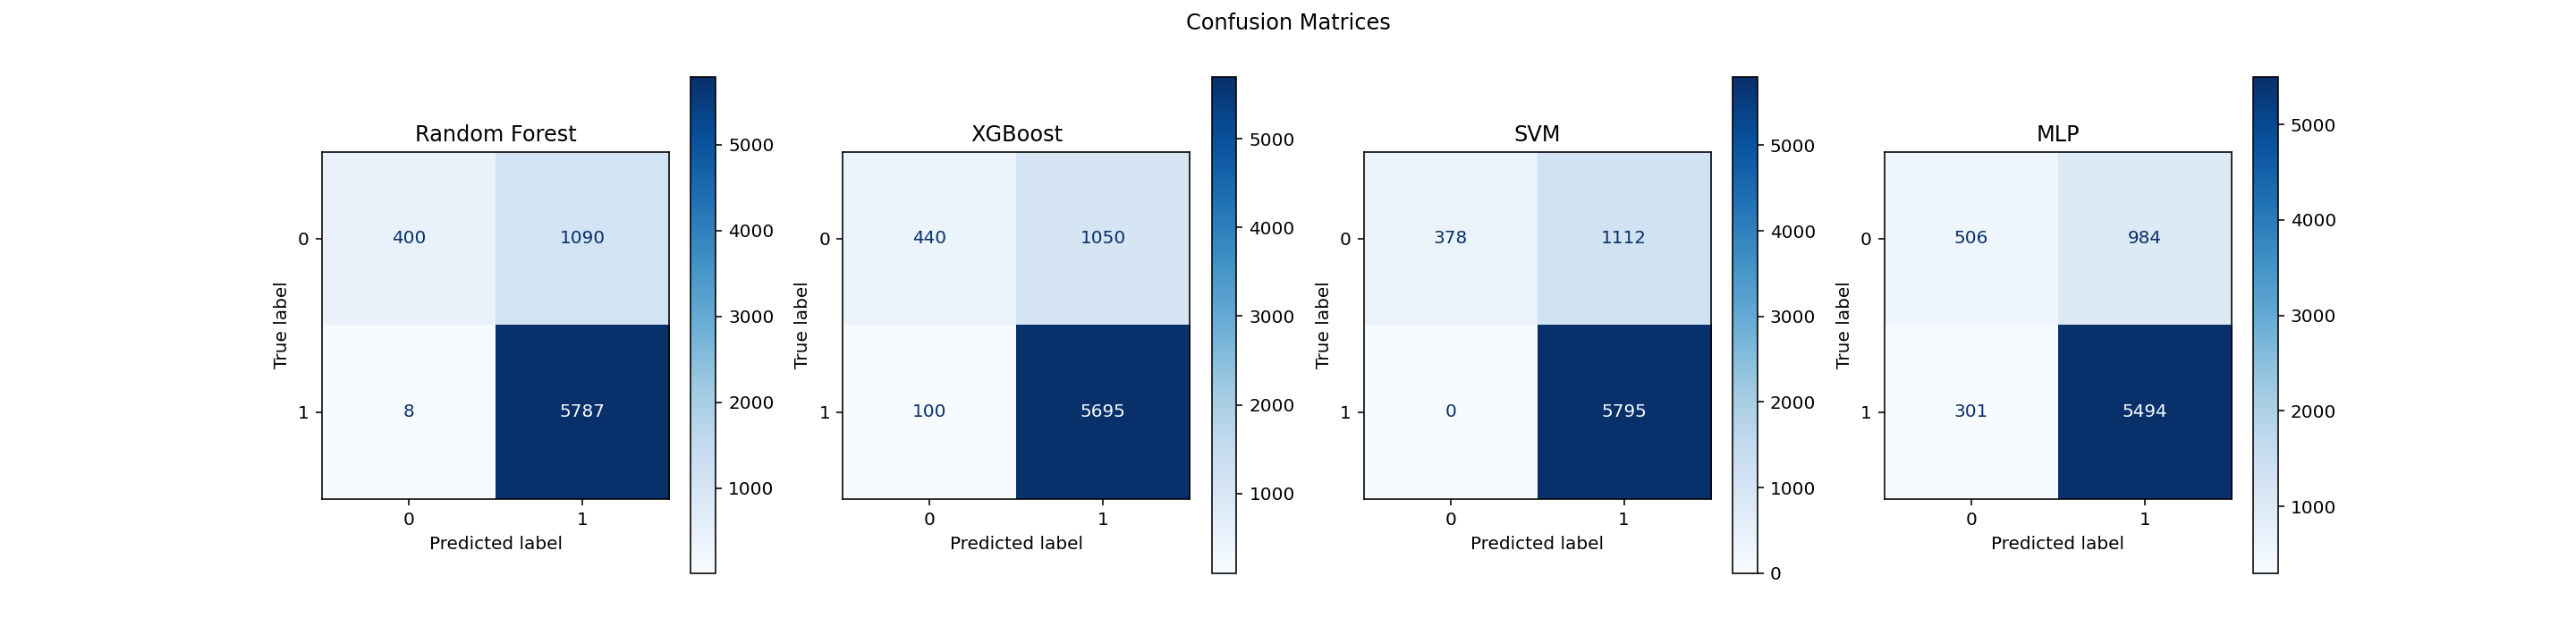

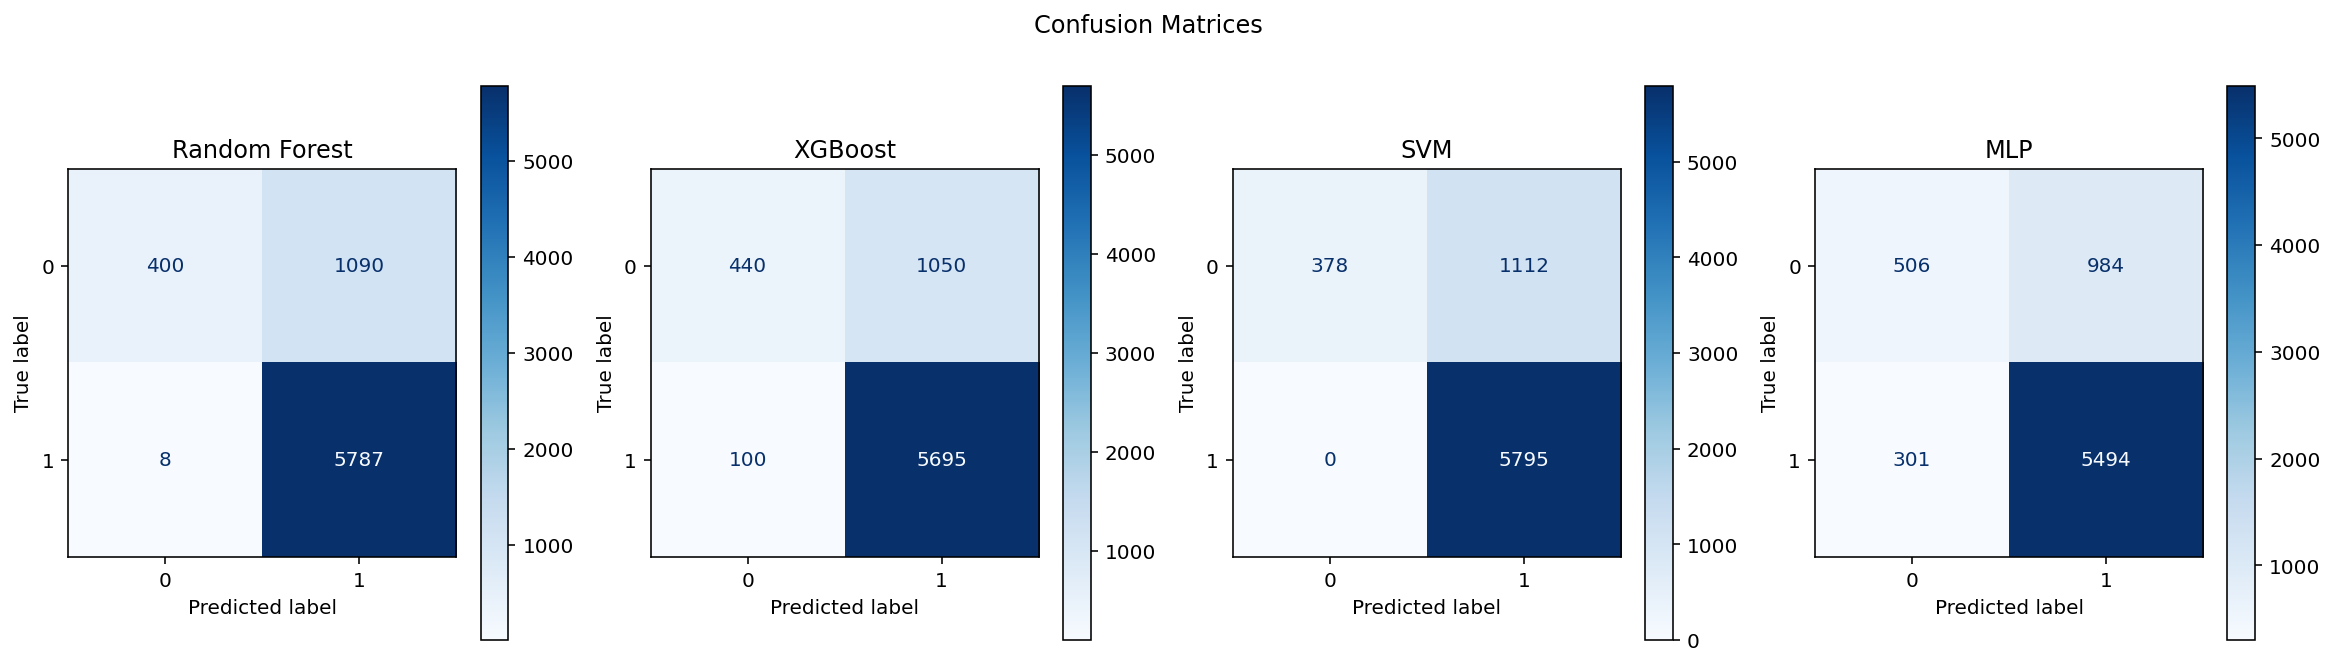

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import holoviews as hv
import hvplot.pandas
import panel as pn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

hv.extension("bokeh")
pn.extension()

# ------------------ LOAD & PREPARE DATA ------------------

# Load dataset
file_path = "Prepared_Bank_Dataset.csv"  # Update path if needed
data = pd.read_csv(file_path)

# Convert Loan Status into a binary classification target
data["Loan_Status_Binary"] = (data["Loan Status"] > 0).astype(int)

# Drop the original Loan Status column
X = data.drop(columns=["Loan Status", "Loan_Status_Binary"])
y = data["Loan_Status_Binary"]

# Convert categorical features to numeric
label_encoders = {}
for col in X.select_dtypes(exclude=["number"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Split dataset into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ------------------ FEATURE IMPORTANCE ANALYSIS ------------------

# Train a baseline model to determine important features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Feature selection dropdown (Allowing multiple selections)
feature_selector = pn.widgets.MultiSelect(
    name="Select Features for Resampling",
    options=list(X.columns),
    value=[feature_importances.iloc[0]["Feature"]]  # Default: most important feature
)

# ------------------ FIXED UPSAMPLING & DOWNSAMPLING FUNCTIONS ------------------

def upsample_data(X_train, y_train, selected_features):
    smote = SMOTE(sampling_strategy=0.6, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train[selected_features], y_train)

    # Convert back to full feature set
    X_resampled = pd.DataFrame(X_resampled, columns=selected_features)
    X_resampled = X_train.copy()
    X_resampled[selected_features] = X_resampled[selected_features]  # Fill selected features only

    return X_resampled, y_resampled

def downsample_data(X_train, y_train, selected_features):
    rus = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X_train[selected_features], y_train)

    # Convert back to full feature set
    X_resampled = pd.DataFrame(X_resampled, columns=selected_features)
    X_resampled = X_train.copy()
    X_resampled[selected_features] = X_resampled[selected_features]  # Fill selected features only

    return X_resampled, y_resampled

# ------------------ DEFINE MODELS & TRAIN FUNCTION ------------------

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

def train_models(X_train, y_train):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute performance metrics
        f1 = f1_score(y_test, y_pred, average="weighted")
        cm = confusion_matrix(y_test, y_pred)

        # Compute Specificity & Sensitivity
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

        results[name] = {
            "Model": model,
            "F1-score": f1,
            "Confusion Matrix": cm,
            "Specificity": specificity,
            "Sensitivity": sensitivity
        }
    return results

# ------------------ INTERACTIVE DASHBOARD ------------------

# Create a slider for data distribution control
distribution_slider = pn.widgets.FloatSlider(name="Change Data Distribution", start=-1, end=1, step=0.1, value=0)

# Function to retrain models when slider is moved
def update_dashboard(slider_value, selected_features):
    global X_train, y_train

    # Modify data distribution based on slider value
    if slider_value < 0:
        X_train_resampled, y_train_resampled = downsample_data(X_train, y_train, selected_features)
    elif slider_value > 0:
        X_train_resampled, y_train_resampled = upsample_data(X_train, y_train, selected_features)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train  # No change

    # Retrain models
    model_results = train_models(X_train_resampled, y_train_resampled)

    # Display model performance
    results_df = pd.DataFrame({
        "Model": model_results.keys(),
        "F1 Score": [res["F1-score"] for res in model_results.values()],
        "Specificity": [res["Specificity"] for res in model_results.values()],
        "Sensitivity": [res["Sensitivity"] for res in model_results.values()]
    }).sort_values(by="F1 Score", ascending=False)

    # Confusion matrix plots
    fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
    fig.suptitle("Confusion Matrices")

    for i, (name, result) in enumerate(model_results.items()):
        cm_display = ConfusionMatrixDisplay(result["Confusion Matrix"])
        cm_display.plot(ax=axes[i], cmap="Blues")
        axes[i].set_title(name)

    confusion_matrix_plot = pn.pane.Matplotlib(fig)

    # Specificity vs Sensitivity Plot
    spec_sens_plot = results_df.hvplot.bar(
        x="Model", y=["Specificity", "Sensitivity"], title="Specificity vs Sensitivity",
        height=400, width=600, stacked=False
    )

    return pn.Column(
        pn.pane.Markdown("### Model Performance"),
        pn.pane.DataFrame(results_df),
        pn.pane.Markdown("### Confusion Matrices"),
        confusion_matrix_plot,
        pn.pane.Markdown("### Specificity vs Sensitivity"),
        spec_sens_plot
    )

# Bind function to the slider and feature selector
dashboard = pn.bind(update_dashboard, distribution_slider, feature_selector)

# Layout
pn.Column(
    pn.pane.Markdown("# Loan Approval Prediction Dashboard"),
    pn.pane.Markdown("### Select Features for Resampling"),
    feature_selector,
    distribution_slider,
    dashboard
).servable()
